# **Lineer Regression**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('/Users/lardof/Machine Learning/community_health.csv')

In [3]:
df.describe()

,age,weight,height,visits
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,45.019000,199.045000,67.300000,19.956000
std,14.839166,52.815077,6.285341,6.455055
min,0.000000,45.000000,46.000000,2.000000
25%,36.000000,165.000000,63.000000,15.000000
50%,45.000000,197.000000,67.000000,20.000000
75%,55.000000,236.000000,72.000000,24.000000
max,89.000000,356.000000,86.000000,40.000000


In [4]:
df.corr()

/var/folders/53/f0_9vw5576j9nxzspd4wsrxw0000gn/T/ipykernel_95562/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,weight,height,visits
age,1.000000,-0.084920,-0.063822,0.539543
weight,-0.084920,1.000000,0.142064,0.543139
height,-0.063822,0.142064,1.000000,-0.385644
visits,0.539543,0.543139,-0.385644,1.000000


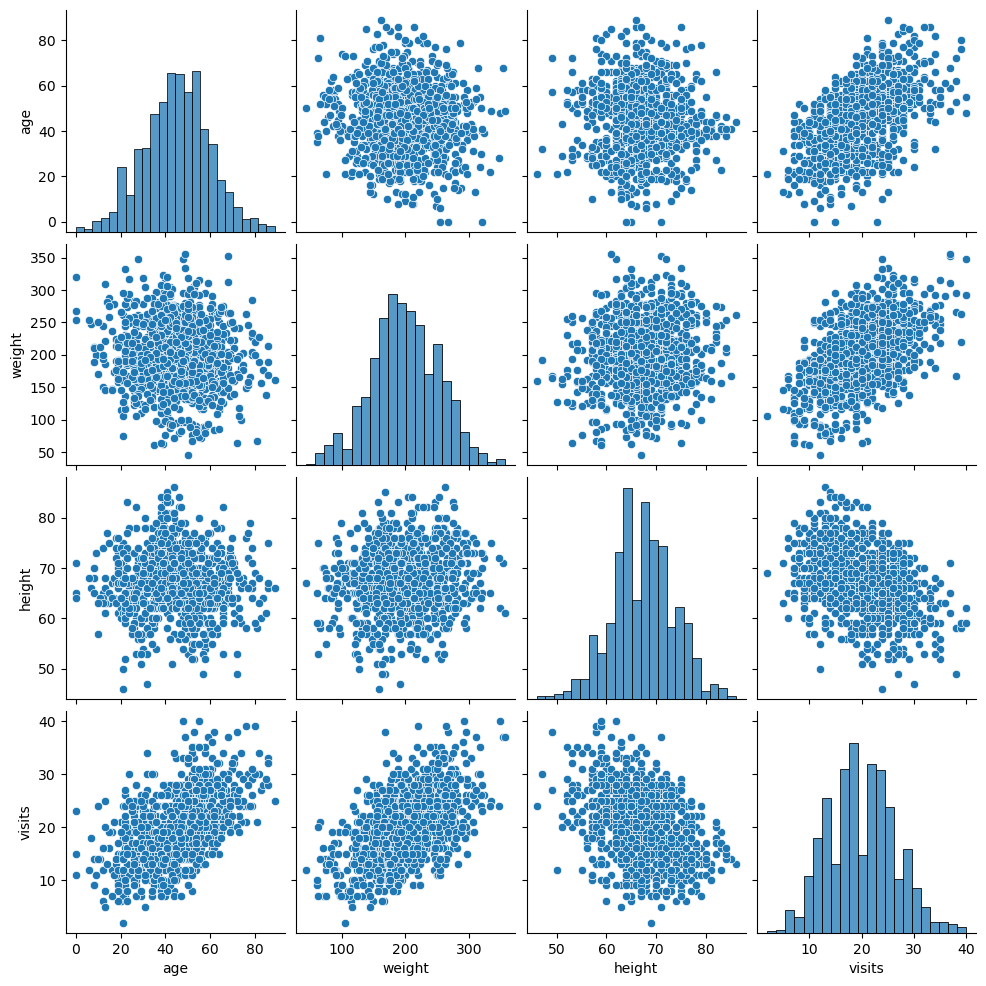

In [5]:
sns.pairplot(df)

In [6]:
## Veri Düzenleme

In [7]:
df.head(3)

,age,gender,race/ethnicity,weight,height,visits
0,47,female,group D,247,65,28
1,26,male,group C,283,66,23
2,26,male,group B,201,68,14


In [8]:
df.rename(columns={
    'age' : 'yas',
    'gender' : 'cinsiyet',
    'race/ethnicity' : 'ırk',
    'weight' : 'kilo',
    'height' : 'boy'
}, inplace=True

)

In [9]:
df['kilo'] = round(df['kilo'] * 0.45)
df['boy'] = round(df['boy']) * 2.54

In [10]:
df.head(3)

,yas,cinsiyet,ırk,kilo,boy,visits
0,47,female,group D,111.0,165.10,28
1,26,male,group C,127.0,167.64,23
2,26,male,group B,90.0,172.72,14


In [11]:
 df['cinsiyet'].replace({
     'female' : 0,
     'male' : 1
 }, inplace=True)
    
df.head(3)

,yas,cinsiyet,ırk,kilo,boy,visits
0,47,0,group D,111.0,165.10,28
1,26,1,group C,127.0,167.64,23
2,26,1,group B,90.0,172.72,14


In [12]:
df['ırk'] = df['ırk'].replace({
    'group A' : 1,
    'group B' : 2,
    'group C' : 3,
    'group D' : 4,
    'group E' : 5,
})

In [13]:
df.head(5)

,yas,cinsiyet,ırk,kilo,boy,visits
0,47,0,4,111.0,165.10,28
1,26,1,3,127.0,167.64,23
2,26,1,2,90.0,172.72,14
3,39,1,3,107.0,185.42,21
4,55,1,1,90.0,154.94,27


In [14]:
df.to_csv('community_health_MLR.csv', index=False)

# Train Test Split

In [15]:
X = df.drop('visits', axis = 1)

In [16]:
y = df['visits']

In [17]:
X.head()

,yas,cinsiyet,ırk,kilo,boy
0,47,0,4,111.0,165.10
1,26,1,3,127.0,167.64
2,26,1,2,90.0,172.72
3,39,1,3,107.0,185.42
4,55,1,1,90.0,154.94


In [18]:
from sklearn.model_selection import train_test_split

In [19]:
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
    Split arrays or matrices into random train and test subsets.
    
    Quick utility that wraps input validation,
    ``next(ShuffleSplit().split(X, y))``, and application to input data
    into a single call for splitting (and optionally subsampling) data into a
    one-liner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)

In [21]:
X_train.head()

,yas,cinsiyet,ırk,kilo,boy
26,45,0,4,100.0,195.58
155,21,1,5,84.0,177.80
872,47,1,2,62.0,177.80
383,64,0,4,72.0,172.72
648,50,1,3,93.0,162.56


# Lin Regression

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
regr = LinearRegression()

In [24]:
regr.fit(X_train, y_train)

LinearRegression()

In [25]:
test_preds = regr.predict(X_test)

In [26]:
test_preds

array([25.429826  , 16.37488865, 15.94618445, 12.62250375, 28.92472645,
       12.37988218, 18.24849851, 12.95833225, 25.88617963, 16.5110815 ,
       14.66618892, 17.31508178, 16.81580161, 17.14965343, 28.71968726,
       12.47619739, 17.34763719, 22.8599942 , 24.70137468, 11.35205872,
       10.85687586, 30.69059756, 20.44934659, 17.26539323, 23.04927692,
       23.02940529, 22.17252275, 15.05207856, 30.64354488, 15.01934415,
       18.29152905, 27.81918757, 22.86856467, 28.83542847, 27.2275673 ,
       13.06731403, 18.27912045, 20.92657028, 10.64892198, 24.20912771,
       19.36308528, 18.57903181, 25.03840299, 21.16631656, 13.41084255,
       16.30817057, 25.24173873,  8.79992567, 19.88591601, 25.98647515,
       20.82208702, 24.25424952, 23.17744512, 16.67966796,  7.85031884,
       17.93012538, 13.68594175, 17.47162267, 29.25882287, 20.7035681 ,
       21.5486915 , 19.05925421, 13.43881142, 25.24517565, 18.27105621,
       13.92568802, 19.64071655, 14.17706046, 16.07624392, 35.13

In [27]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [28]:
print('Theta :     ', (regr.coef_,))
print('intercept : ', (regr.intercept_,))
print('R^2 :       ', (r2_score(y_test,test_preds),))
print('MAE :       ', (mean_absolute_error(y_test, test_preds),))
print('RMSE :      ', (np.sqrt(mean_squared_error(y_test,test_preds),)))
#Bu modelin bir önceki modele göre çok daha başarılı bir model olduğunu anlayabiliyoruz.
#Bir öncekinde r^2 değeri çok yükselid bu modelin regresonya uygunluğunun arttığnı bize söyler
#bir önceki verilerde bu değer 0.29 du

Theta :      (array([ 0.24718831,  0.10713494, -0.00209006,  0.17868018, -0.17567627]),)
intercept :  (22.77316024629139,)
R^2 :        (0.841330232412521,)
MAE :        (2.2348621313548613,)
RMSE :       2.636402343922566


In [29]:
df['visits'].mean() , df['visits'].std()
#Burada mse değeri ss nın 3 katına eşitse burdan şunu anlayabiliriz bu bize tutarlı veriler verir.

(19.956, 6.455054742737022)

# Final

In [30]:
final = LinearRegression()

In [31]:
X_train.shape

(700, 5)

In [32]:
final.fit(X, y)

LinearRegression()

In [33]:
y_hat = final.predict(X)

In [34]:
final.coef_

array([ 0.24627966,  0.09481203,  0.01577429,  0.17732295, -0.1798561 ])

In [35]:
X.head()


,yas,cinsiyet,ırk,kilo,boy
0,47,0,4,111.0,165.10
1,26,1,3,127.0,167.64
2,26,1,2,90.0,172.72
3,39,1,3,107.0,185.42
4,55,1,1,90.0,154.94


In [36]:
coef_df = pd.DataFrame(final.coef_, X.columns, columns=['katsayı'])

In [37]:
coef_df

,katsayı
yas,0.246280
cinsiyet,0.094812
ırk,0.015774
kilo,0.177323
boy,-0.179856


In [38]:
print(df['yas'].mean())
print(df['cinsiyet'].mean())
print(df['ırk'].mean())
print(df['kilo'].mean())
print(df['boy'].mean())


45.019
0.481
3.155
89.574
170.942


In [39]:
insan_evladi = [[30,0,1,60,164]]

In [40]:
insan_evladi

[[30, 0, 1, 60, 164]]

In [41]:
final.predict(insan_evladi)
#Bu kişinin kaç defa hastaneye gittiğini tahmin ediyor bize.

/Users/lardof/anaconda3/envs/mete/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([12.18193984])

In [42]:
X.iloc[135]

yas          48.00
cinsiyet      1.00
ırk           4.00
kilo        107.00
boy         180.34
Name: 135, dtype: float64

In [43]:
denek = [[48,1,4,107,180]]

In [44]:
final.predict(denek)

/Users/lardof/anaconda3/envs/mete/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([22.21358949])

In [45]:
y.iloc[135]
#hata payımız 2.24 tü burda da 22.21 bularak gayet başarılı bir tahmin elde ettik.

24

# Residual

In [46]:
residual = y_hat - y

In [47]:
residual

0     -2.738354
1     -0.450857
2      1.058751
3     -1.993522
4     -1.617072
         ...   
995    3.049673
996    1.034830
997    0.528075
998   -2.953112
999    3.382327
Name: visits, Length: 1000, dtype: float64

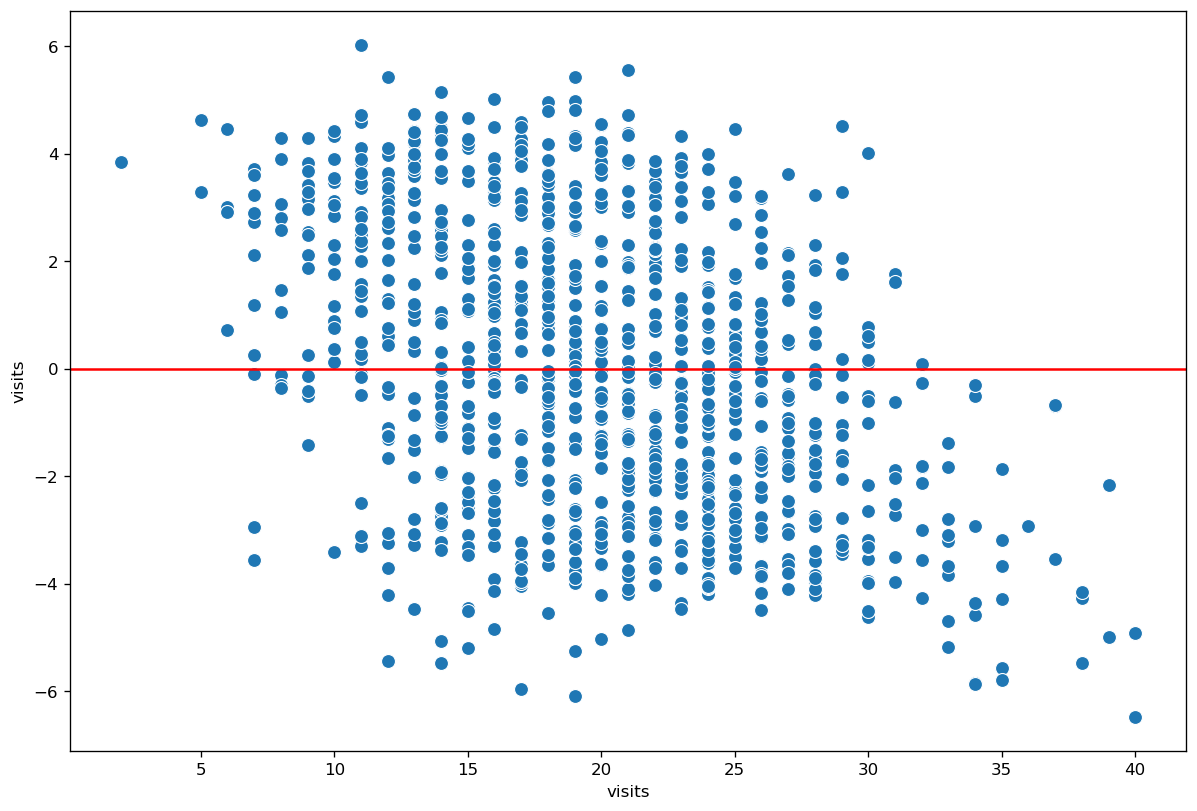

In [48]:
plt.figure(figsize=(12,8), dpi=120)
sns.scatterplot(x=y, y=residual,s=70);
plt.axhline(y = 0, color='r')


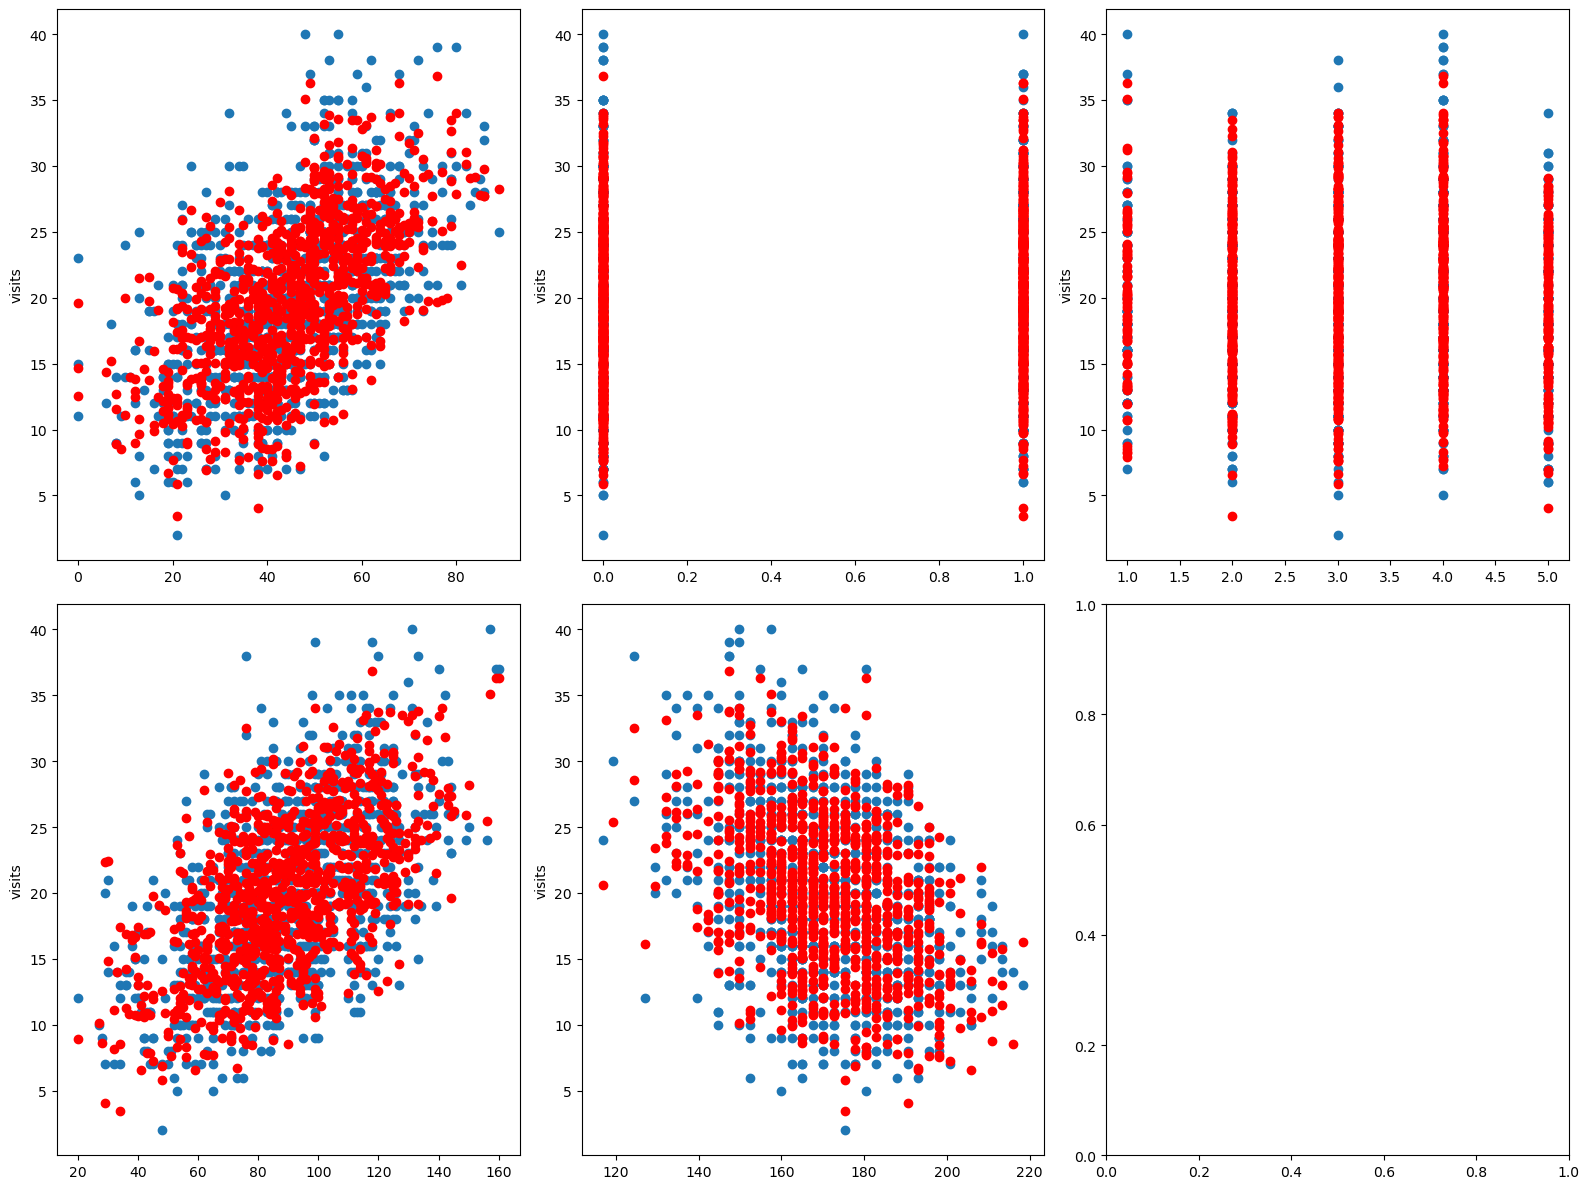

In [50]:
fig,axes = plt.subplots(nrows=2,ncols=3,figsize=(16,12))

axes[0,0].plot(df['yas'],df['visits'],'o')
axes[0,0].plot(df['yas'],y_hat,'o',color='red')
axes[0,0].set_ylabel("visits")

axes[0,1].plot(df['cinsiyet'],df['visits'],'o')
axes[0,1].plot(df['cinsiyet'],y_hat,'o',color='red')
axes[0,1].set_ylabel("visits")

axes[0,2].plot(df['ırk'],df['visits'],'o')
axes[0,2].plot(df['ırk'],y_hat,'o',color='red')
axes[0,2].set_ylabel("visits")

axes[1,0].plot(df['kilo'],df['visits'],'o')
axes[1,0].plot(df['kilo'],y_hat,'o',color='red')
axes[1,0].set_ylabel("visits")

axes[1,1].plot(df['boy'],df['visits'],'o')
axes[1,1].plot(df['boy'],y_hat,'o',color='red')
axes[1,1].set_ylabel("visits")

plt.tight_layout();